In [1]:
!pip install --upgrade pip


^C


In [2]:
!pip install text-hammer

In [3]:
!pip install imblearn

In [4]:
!pip install --upgrade scikit-learn

In [2]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer

# import imblearn
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.over_sampling import RandomOverSampler

from sklearn.metrics import pairwise_distances
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [3]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [4]:
df = pd.read_csv('mbti_1.csv')
#df1=df[:10]
print(len(df))
df.head()

8675


,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [5]:
df=df.dropna()
df.reset_index(inplace=True)
df.head()

,index,type,posts
0,0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,1,ENTP,'I'm finding the lack of me in these posts ver...
2,2,INTP,'Good one _____ https://www.youtube.com/wat...
3,3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,4,ENTJ,'You're fired.|||That's another silly misconce...


In [6]:
!pip install spacy
!python -m spacy download en_core_web_sm

2023-04-10 11:27:23.990364: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2023-04-10 11:27:23.990440: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-10 11:27:32.103165: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2023-04-10 11:27:32.103683: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-04-10 11:27:32.112317: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: LAPTOP-OFO3GOV5
2023-04-10 11:27:32.112522: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: LAPTOP-OFO3GOV5
Traceback (most recent call last):
  File "C:\Users\karti\Anaconda3\lib\site-packages\urllib3\connection.p

In [8]:
import text_hammer as th
import spacy

nlp = spacy.load("en_core_web_sm")

def text_preprocessing(df,col_name):
    column = col_name
    type(df[column])
    df[column] = df[column].progress_apply(lambda x:str(x).lower())
    print(type(df[column]))
    print(1)
    df[column] = df[column].progress_apply(lambda x: th.cont_exp(x)) #you're -> you are; i'm -> i am
    print(type(df[column]))
    print(2)
    df[column] = df[column].progress_apply(lambda x: th.remove_emails(x))
    print(type(df[column]))
    print(3)
    df[column] = df[column].progress_apply(lambda x: th.remove_html_tags(x))
    print(type(df[column]))
    print(4)
    df[column] = df[column].progress_apply(lambda x: th.remove_urls(x))
    print(df[column])
    print(4)
    df[column] = df[column].progress_apply(lambda x: th.remove_stopwords(x))
    print(type(df[column]))
    print(5)
    #df[column] = df[column].progress_apply(lambda x:th.spelling_correction(x))
    #print(type(df[column]))
    print(6)
    df[column] = df[column].progress_apply(lambda x: th.remove_special_chars(str(x)))
    print(type(df[column]))
    df[column]=pd.Series(df[column])
    print(7)
    df[column] = df[column].progress_apply(lambda x: th.remove_accented_chars(x))
    print(type(df[column]))
    print(8)
    df[column] = df[column].progress_apply(lambda x: th.make_base(x)) #ran -> run,
    print(type(df[column]))
    print(9)
    return(df)

C:\Users\karti\Anaconda3\lib\site-packages\tqdm\std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [ ]:
# df=text_preprocessing(df1,"posts")

import time
# Record the start time
start_time = time.time()

# Your program code goes here
df=text_preprocessing(df,"posts")
# Record the end time
end_time = time.time()

# Calculate the time taken
time_taken = end_time - start_time

print(f"Time taken: {time_taken:.5f} seconds")


<class 'pandas.core.series.Series'>
1



<class 'pandas.core.series.Series'>
2



<class 'pandas.core.series.Series'>
3



<class 'pandas.core.series.Series'>
4



0       '||||||enfp and intj moments    sportscenter n...
1       'i am finding the lack of me in these posts ve...
2       'good one  _____   |||of course, to which i sa...
3       'dear intp,   i enjoyed our conversation the o...
4       'you're fired.|||that is another silly misconc...
                              ...                        
8670    '|||ixfp just because i always think of cats a...
8671    'so...if this thread already exists someplace ...
8672    'so many questions when i do these things.  i ...
8673    'i am very conflicted right now when it comes ...
8674    'it has been too long since i have been on per...
Name: posts, Length: 8675, dtype: object
4


In [12]:
type(df)
#print(df.iloc[:,1])
print(df.head(10))

   index  type                                              posts
0      0  INFJ  enfp intj moment sportscenter play prankswhat ...
1      1  ENTP  I find lack post alarmingsex boring position o...
2      2  INTP  good _ _ _ _ _ of course know blessing cursedo...
3      3  INTJ  dear intp enjoy conversation day esoteric gabb...
4      4  ENTJ  you re firedthat silly misconception approach ...
5      5  INTJ  1837 science perfect scientist claim is scient...
6      6  INFJ  no draw nail haha professional nail yes gel me...
7      7  INTJ  I tend build collection thing desktop use freq...
8      8  INFJ  sure good question distinction dependant perce...
9      9  INTP  I position actually let person reason unfortun...


In [13]:
y = df.iloc[:,1].values
print("before: \n",y)
le=LabelEncoder()
y=le.fit_transform(y)
y=to_categorical(y)
print("After: \n",y)

before: 
 ['INFJ' 'ENTP' 'INTP' ... 'INTP' 'INFP' 'INFP']
After: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


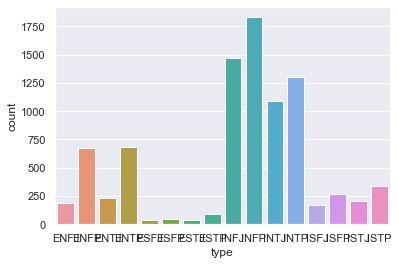

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set()

# Convert the column to categorical type
df.iloc[:, 1] = pd.Categorical(df.iloc[:, 1])

# Plot the count of each category
sns.countplot(x=df.iloc[:, 1])
plt.show()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\karti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

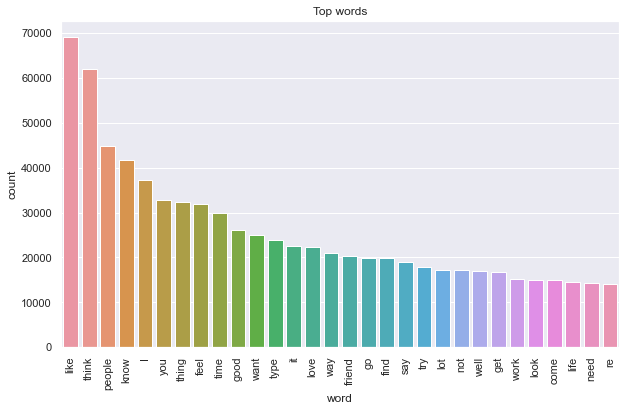

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('punkt')
words_list = []
for post in df['posts']:
    words_list.extend(nltk.word_tokenize(post))
freq_dist = nltk.FreqDist(words_list)
freq_dist.most_common(20)
temp = pd.DataFrame(freq_dist.most_common(30),  columns=['word', 'count'])
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count', 
            data=temp, ax=ax)
plt.title("Top words")
plt.xticks(rotation='vertical')

     ------------------------------------ 152.9/152.9 kB 829.6 kB/s eta 0:00:00


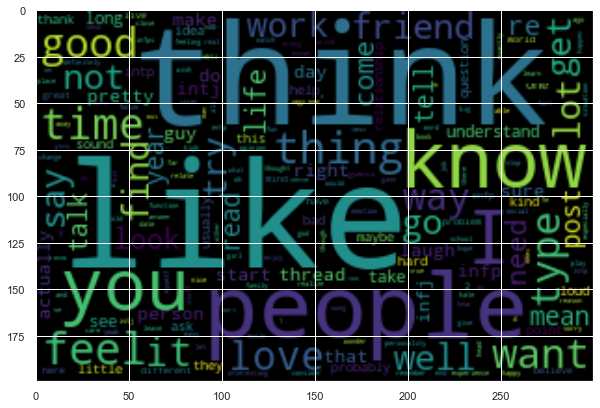

In [18]:
!pip install wordcloud
from wordcloud import WordCloud
import wordcloud
# creation of wordcloud
wcloud_fig = WordCloud( stopwords=set(wordcloud.STOPWORDS),
                      colormap='viridis', width=300, height=200).generate_from_frequencies(freq_dist)

# plotting the wordcloud
plt.figure(figsize=(10,7), frameon=True)

plt.imshow(wcloud_fig, interpolation  = 'bilinear')
plt.show()

In [19]:
df['words_per_comment'] = df['posts'].apply(lambda x: len(x.split())/50)
df.head()

,index,type,posts,words_per_comment
0,0,INFJ,enfp intj moment sportscenter play prankswhat ...,5.64
1,1,ENTP,I find lack post alarmingsex boring position o...,8.92
2,2,INTP,good _ _ _ _ _ of course know blessing cursedo...,8.24
3,3,INTJ,dear intp enjoy conversation day esoteric gabb...,9.94
4,4,ENTJ,you re firedthat silly misconception approach ...,9.00


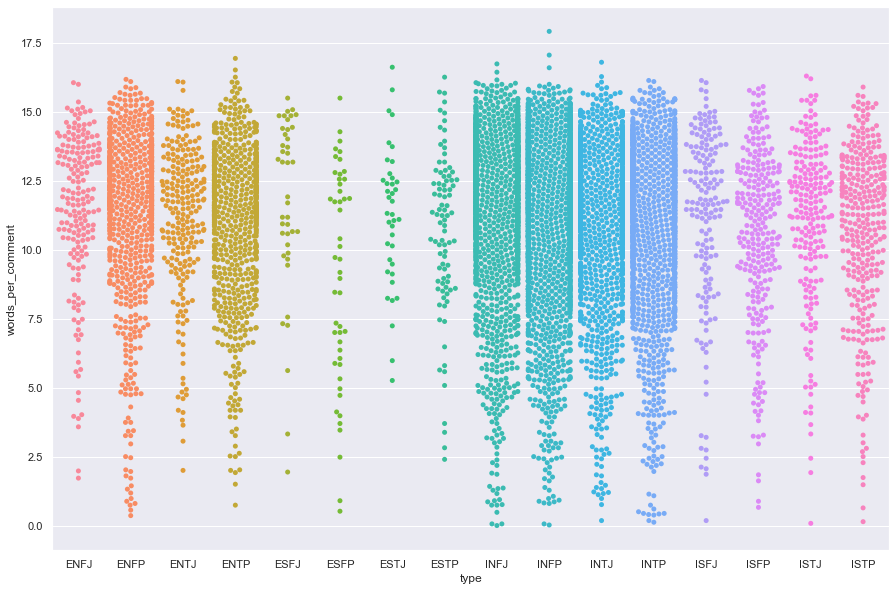

In [20]:
plt.figure(figsize=(15,10))
# sns.swarmplot("type", "words_per_comment", data=df)
sns.swarmplot(x="type", y="words_per_comment", data=df)

In [21]:
voc_size = 50000
messages=df['posts'].copy()
messages

0       enfp intj moment sportscenter play prankswhat ...
1       I find lack post alarmingsex boring position o...
2       good _ _ _ _ _ of course know blessing cursedo...
3       dear intp enjoy conversation day esoteric gabb...
4       you re firedthat silly misconception approach ...
                              ...                        
8670    ixfp think cat fi dom reason especially websit...
8671    soif thread exist someplace which do heck dele...
8672    so question thing purple pill pick win lottery...
8673    I conflict right come want child honestly mate...
8674    it long personalitycafe change bit good like t...
Name: posts, Length: 8675, dtype: object

In [22]:
ps=PorterStemmer()
corpus=[]
for i in range (0,len(messages)):
    review = re.sub('[^a-zA-Z]','',messages[i])
    review=review.lower()
    review=review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english') ]
    review=''.join(review)
    corpus.append(review)
print(corpus)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [23]:
oe=[one_hot(words,voc_size) for words in corpus ]

In [24]:
sent_length=250
embedded_docs = pad_sequences(oe,padding='pre',maxlen = sent_length)
embedded_docs

array([[    0,     0,     0, ...,     0,     0, 15663],
       [    0,     0,     0, ...,     0,     0, 42997],
       [    0,     0,     0, ...,     0,     0, 49343],
       ...,
       [    0,     0,     0, ...,     0,     0,  6346],
       [    0,     0,     0, ...,     0,     0, 49763],
       [    0,     0,     0, ...,     0,     0, 36455]])

In [25]:
df.type.value_counts()

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

In [33]:
dimension=100
model = Sequential()
model.add(Embedding(voc_size,dimension,input_length = sent_length))
model.add(Dropout(0.25))
model.add(LSTM(100))
model.add(Dropout(0.25))
model.add(Dense(16,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer ='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 250, 100)          5000000   
                                                                 
 dropout_2 (Dropout)         (None, 250, 100)          0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 16)                1616      
                                                                 
Total params: 5,082,016
Trainable params: 5,082,016
Non-trainable params: 0
_________________________________________________________________


In [34]:
X=np.array(embedded_docs)

In [35]:
ros = RandomOverSampler(random_state=42) # fit predictor and target variable
x_rus, y_rus = ros.fit_resample(X, y)

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x_rus, y_rus, test_size=0.2, random_state=42)

In [39]:
callbacks = [EarlyStopping( monitor="val_accuracy", patience=2 ), 
             ModelCheckpoint('model0.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)]

In [40]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,batch_size=64, callbacks = callbacks )

Epoch 1/5
367/367 [==============================] - ETA: 0s - loss: 0.6430 - accuracy: 0.8276
Epoch 1: val_accuracy improved from -inf to 0.84104, saving model to model0.h5
367/367 [==============================] - 118s 323ms/step - loss: 0.6430 - accuracy: 0.8276 - val_loss: 0.5098 - val_accuracy: 0.8410
Epoch 2/5
367/367 [==============================] - ETA: 0s - loss: 0.2402 - accuracy: 0.9533
Epoch 2: val_accuracy improved from 0.84104 to 0.85588, saving model to model0.h5
367/367 [==============================] - 114s 312ms/step - loss: 0.2402 - accuracy: 0.9533 - val_loss: 0.4720 - val_accuracy: 0.8559
Epoch 3/5
367/367 [==============================] - ETA: 0s - loss: 0.1436 - accuracy: 0.9605
Epoch 3: val_accuracy did not improve from 0.85588
367/367 [==============================] - 112s 306ms/step - loss: 0.1436 - accuracy: 0.9605 - val_loss: 0.4844 - val_accuracy: 0.8499
Epoch 4/5
367/367 [==============================] - ETA: 0s - loss: 0.1246 - accuracy: 0.9593
Epo

In [41]:
from sklearn.metrics import accuracy_score
print(len(x_test[0]))
preds = model.predict(x_test)
o=np.argmax(preds,axis=1)

250
184/184 [==============================] - 7s 36ms/step


In [ ]:
t=list(set(df.iloc[:,1]))
s=input()
s =str(s).lower()
s=th.cont_exp(s) #you're -> you are; i'm -> i am
s=th.remove_emails(s)
s =th.remove_html_tags(s)
s=th.remove_urls(s)
s = th.remove_stopwords(s)
    #df[column] = df[column].progress_apply(lambda x:th.spelling_correction(x))
    #print(type(df[column]))
s =th.remove_special_chars(s)
s = th.remove_accented_chars(s)
s = th.make_base(s) #ran -> run,
#print(s)
words_list = []
words_list.extend(nltk.word_tokenize(s))
freq_dist = nltk.FreqDist(words_list)
freq_dist.most_common(20)
temp = pd.DataFrame(freq_dist.most_common(30),  columns=['word', 'count'])
#fig, ax = plt.subplots(figsize=(10, 6))
#sns.barplot(x='word', y='count', data=temp, ax=ax)
ps=PorterStemmer()
corpus=[]
review = re.sub('[^a-zA-Z]','',s)
review=review.lower()
review=review.split()
review = [ps.stem(word) for word in review if not word in stopwords.words('english') ]
review=''.join(review)
corpus.append(review)
oe=[one_hot(words,voc_size) for words in corpus ]
sent_length=250
embedded_docs = pad_sequences(oe,padding='pre',maxlen = sent_length)
embedded_docs
X=np.array(embedded_docs)
p=model.predict(X)
o1=np.argmax(p,axis=1)
print("Personality:",t[o1[0]])

In [ ]:
from sklearn.metrics import confusion_matrix
true_cat = []
for y in y_test:
  true_cat.append(np.where(y==1)[0])
predicted_cat = tf.argmax(preds, axis=1)
predicted_cat
print(confusion_matrix(predicted_cat, true_cat))